Error de redondeo

Error de truncamiento

In [1]:
x = 3.1416
x

3.1416

In [2]:
print(f'{x:.20f}')

3.14159999999999994813


In [3]:
y = x + 0.0000000000000001
print(f'{y:.20f}')

3.14159999999999994813


In [4]:
y


3.1416

$1 + \epsilon = 1$

In [6]:
epsilon = 0.5

while 1. + epsilon != 1.:
    epsilon = epsilon /2

epsilon

1.1102230246251565e-16

---

In [7]:
import numpy as np

np.pi

3.141592653589793

In [8]:
 np.cos(np.pi/2)

6.123233995736766e-17

---

In [9]:
z = np.sqrt(3)
z

1.7320508075688772

In [10]:
z*z

2.9999999999999996

---

Error de truncamiento

In [16]:
np.sin(np.pi)

1.2246467991473532e-16

In [17]:
def my_sin(x):
    '''
    Mi version de la funcion seno
    '''
    mysin = x - x**3/6 + x**5/120
    return mysin

my_sin(0)

0.0

In [18]:
my_sin(np.pi/2)

1.0045248555348174

In [19]:
my_sin(np.pi)

0.5240439134171688

In [20]:
def trunc_error(x):
    '''
    Compara la funcion seno de numpy con 
    la funcion seno definida
    '''
    return np.abs(np.sin(x)-my_sin(x))


In [23]:
trunc_error(np.pi)

0.5240439134171687

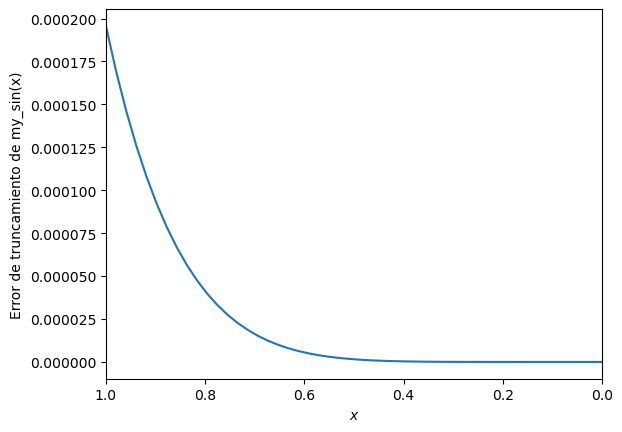

In [25]:
import matplotlib.pyplot as plt


xx = np.linspace(0, 1, 50)

plt.figure()
plt.plot(xx, trunc_error(xx))
plt.xlim(1,0)
plt.xlabel(r'$x$')
plt.ylabel(r'Error de truncamiento de my_sin(x)')

plt.show()



---
Diferencias finitas

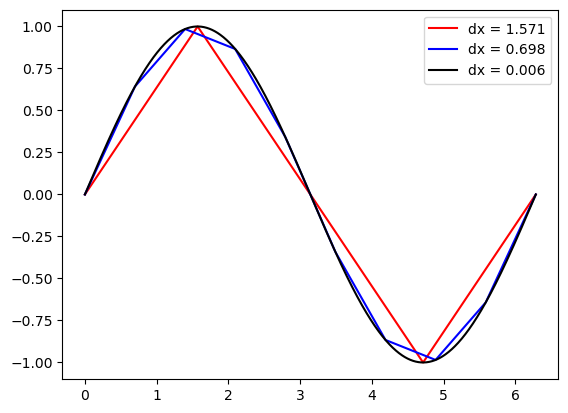

In [32]:
def f(x):
    return np.sin(x)

# Intervalo de trabajo
a = 0.
b = 2*np.pi

# Numero de nodos
N1 = 5
N2 = 10
N3 = 1000

# Malla
grid1 = np.linspace(a, b, N1)
dx1 = grid1[1] - grid1[0]

grid2 = np.linspace(a, b, N2)
dx2 = grid2[1] - grid2[0]

grid3 = np.linspace(a, b, N3)
dx3 = grid3[1] - grid3[0]

plt.figure()
plt.plot(grid1, f(grid1), color= 'red', label = f'dx = {dx1:.3f}')
plt.plot(grid2, f(grid2), color= 'blue', label = f'dx = {dx2:.3f}')
plt.plot(grid3, f(grid3), color= 'black', label = f'dx = {dx3:.3f}')
plt.legend()
plt.show()


---
Derivadas numericas

Derivada hacia adelante

$f'(x_0) = \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x}$

Derivada hacia atras

$f'(x_0) = \frac{f(x_0 ) - f(x_0 - \Delta x)}{\Delta x}$

Derivada centrada

$f'(x_0) = \frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2 \Delta x}$

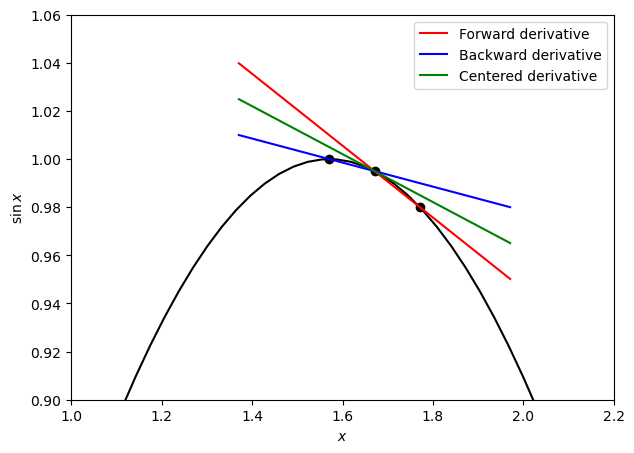

In [47]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x)

def forwardDerivative(f, x, dx):
    return (f(x + dx) - f(x))/dx

def backwardDerivative(f, x, dx):
    return (f(x) - f(x - dx))/dx

def centeredDerivative(f, x, dx):
    return (f(x + dx) - f(x - dx))/(2*dx)


# To draw a staright line defined by the numerical derivatives
def straight_line(x_0, y_0, m, x):
    y = y_0 + m*(x - x_0)
    return y

# Point to calculate the derivative
x_0 = np.pi/2 + 0.1
y_0 = f(x_0)

# Step size in the derivative
dx = 0.1

# Points involved in the numerical derivatives
points_x = [x_0-dx, x_0, x_0+dx]
points_y = [f(x_0-dx), y_0, f(x_0+dx)]

# Numerical derivatives
f_dfdx = forwardDerivative(f, x_0, dx) 
b_dfdx = backwardDerivative(f, x_0, dx) 
c_dfdx = centeredDerivative(f, x_0, dx)

# x-Ranges to plot function and straight lines
x = np.linspace(0, np.pi, 100)
xline = np.linspace(x_0-0.3, x_0+0.3, 50) 

plt.figure(figsize=(7,5))
plt.plot(x, f(x), 'k')
plt.scatter(points_x, points_y, color='black')
plt.plot(xline, straight_line(x_0, y_0, f_dfdx, xline), 'r', label='Forward derivative')
plt.plot(xline, straight_line(x_0, y_0, b_dfdx, xline), 'b', label='Backward derivative')
plt.plot(xline, straight_line(x_0, y_0, c_dfdx, xline), 'g', label='Centered derivative')

plt.xlim(1.,2.2)
plt.ylim(0.9,1.06)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.legend()
plt.show()

In [58]:
def dfdx(x):
    return np.cos(x)



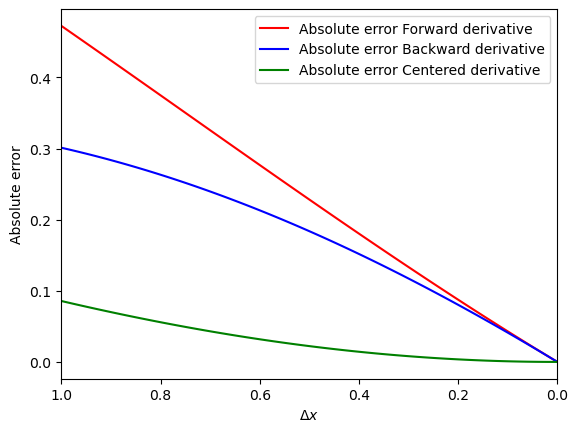

In [59]:

x = 1.

dx_max = 1 
dx_min = 1E-12
dx = np.linspace(dx_min, dx_max, 100)

f_dfdx = forwardDerivative(f, x, dx) 
b_dfdx = backwardDerivative(f, x, dx) 
c_dfdx = centeredDerivative(f, x, dx)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure()
plt.plot(dx, abs_error_f, 'r', label='Absolute error Forward derivative')
plt.plot(dx, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.plot(dx, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$\Delta x$')
plt.ylabel(r'Absolute error')
plt.xlim(dx_max, dx_min)
plt.legend()
plt.show()

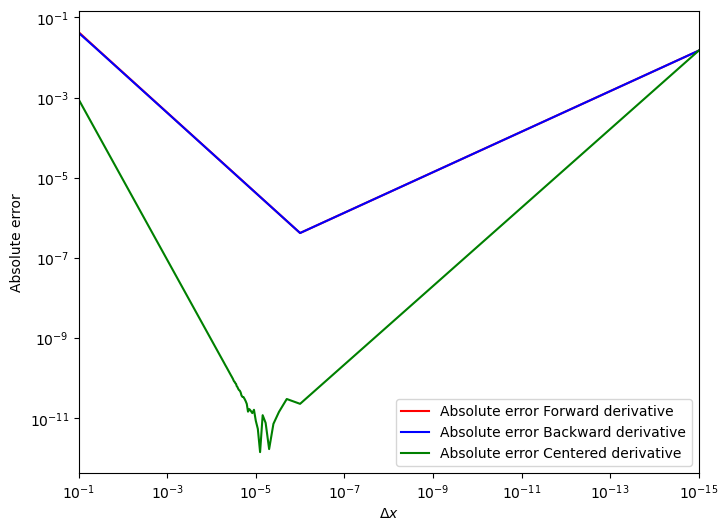

In [60]:
x = 1.

dx_max = 1E-1 
dx_min = 1E-15
dx = np.linspace(dx_min, dx_max, 100000)

f_dfdx = forwardDerivative(f, x, dx) 
b_dfdx = backwardDerivative(f, x, dx) 
c_dfdx = centeredDerivative(f, x, dx)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(8,6))
plt.loglog(dx, abs_error_f, 'r' ,label='Absolute error Forward derivative')
plt.loglog(dx, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.loglog(dx, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$\Delta x$')
plt.ylabel(r'Absolute error')
plt.xlim(dx_max, dx_min)
plt.legend()
plt.show()

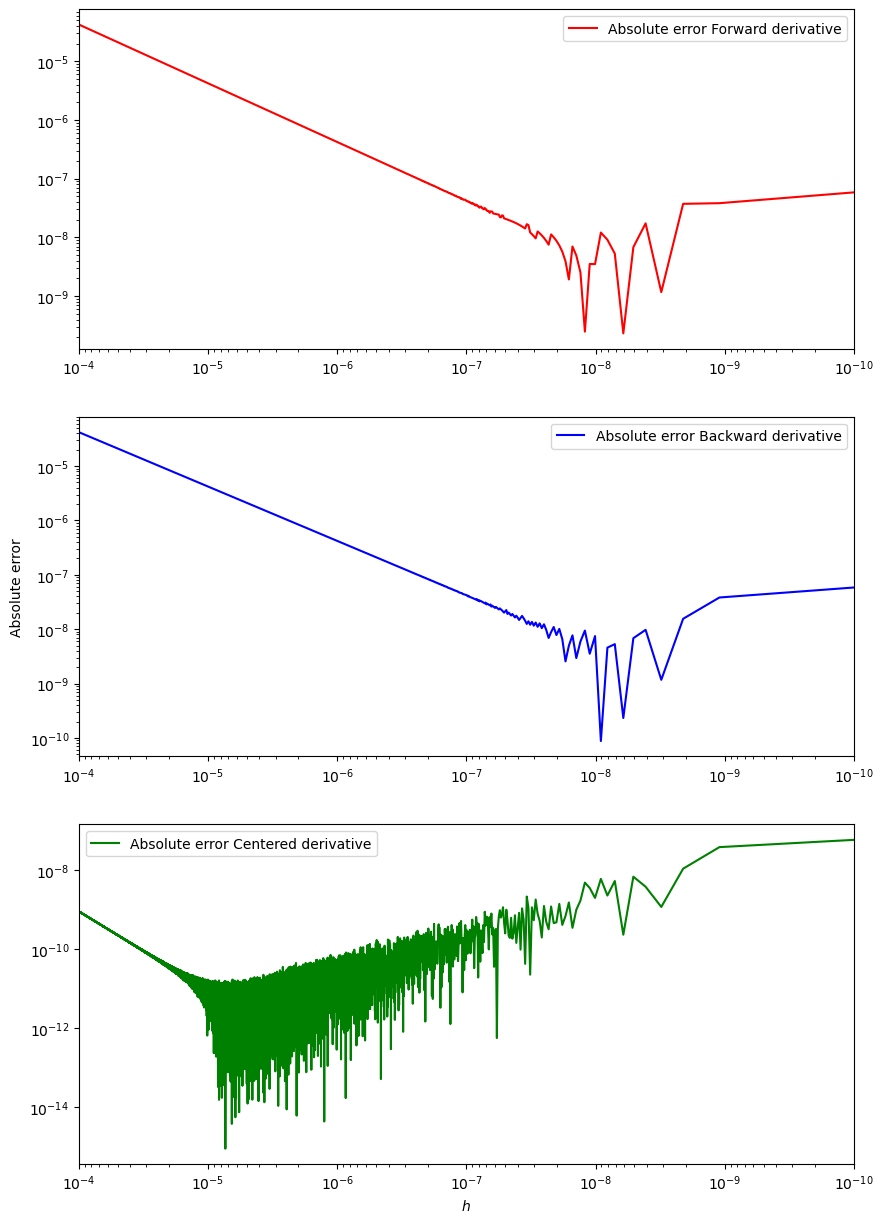

In [61]:
x = 1.

dx_max = 1E-4 
dx_min = 1E-10
dx = np.linspace(dx_min, dx_max, 100000)

f_dfdx = forwardDerivative(f, x, dx) 
b_dfdx = backwardDerivative(f, x, dx) 
c_dfdx = centeredDerivative(f, x, dx)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.loglog(dx, abs_error_f, color='red', label='Absolute error Forward derivative')
plt.xlim(dx_max, dx_min)
plt.legend()

plt.subplot(3,1,2)
plt.loglog(dx, abs_error_b, color='blue',label='Absolute error Backward derivative')
plt.ylabel(r'Absolute error')
plt.xlim(dx_max, dx_min)
plt.legend()

plt.subplot(3,1,3)
plt.loglog(dx, abs_error_c, color='green', label='Absolute error Centered derivative')
plt.xlim(dx_max, dx_min)
plt.legend()

plt.xlabel(r'$h$')
plt.xlim(dx_max, dx_min)
plt.show()